In [ ]:
import numpy as np 
import matplotlib.pyplot as plt

from matplotlib.collections import LineCollection

prior = BoxUniform(low=torch.tensor([0.15, 0.55, -1.3]), high=torch.tensor([0.45, 1.2, -0.7]))  # prior for (O_m, S8, w0)

In [3]:
test = np.load('/share/storage2/fvs/test_cls/cls_lens_zbin0_all_fiducial.npy')

In [3]:
ell = np.arange(0, 2201)

In [4]:
nums = []
sims = {}
for i in range(1, 800):
    filename = f"/share/storage2/fvs/test_cls/cls_zbin0_allrealizations_model{i}.npy"
    try:
        sims[i] = np.load(filename)
        nums.append(i)
    except Exception:
        pass

In [5]:
sims.keys()

dict_keys([1, 34, 35, 36, 40, 49, 55, 59, 69, 74, 76, 85, 86, 111, 117, 120, 125, 127, 128, 129, 130, 133, 136, 143, 144, 145, 147, 149, 151, 152, 153, 157, 160, 161, 163, 164, 169, 171, 173, 177, 179, 184, 187, 188, 189, 190, 192, 193, 196, 198, 201, 203, 204, 205, 206, 208, 209, 211, 212, 213, 217, 218, 219, 221, 224, 229, 231, 232, 233, 234, 237, 239, 240, 245, 247, 248, 249, 255, 257, 259, 260, 261, 265, 266, 267, 268, 269, 273, 275, 276, 277, 281, 283, 285, 286, 289, 291, 293, 297, 695, 705, 712, 718, 721, 723, 726, 741, 744, 747, 748, 749, 750, 751, 752, 753, 754, 759, 760, 762, 763, 764, 765, 766, 767, 771, 773, 775, 776, 777, 778, 779, 780, 781, 782, 783, 784, 785, 786, 788, 789, 790, 791, 793, 794, 795, 796, 797, 798, 799])

In [6]:
sims_mean = []
for i in nums:
    sims_mean.append(np.mean(sims[i], axis=0))

In [7]:
params = np.load('/share/storage2/fvs/params_cosmo_varied_om_s8_w0.npy')

In [8]:
params[1]

array(['0.3', '0.4', '0.2', ..., '0.40865020752', '0.23286895752',
       '0.22193145752'], shape=(2500,), dtype='<U32')

In [9]:
O_m = []
sigma8 = []
w0 = []

for i in nums:
    O_m.append(float(params[1][i - 1]))
    sigma8.append(float(params[2][i - 1]))
    w0.append(float(params[3][i - 1]))

Text(0.5, 1.0, '$w_0$')

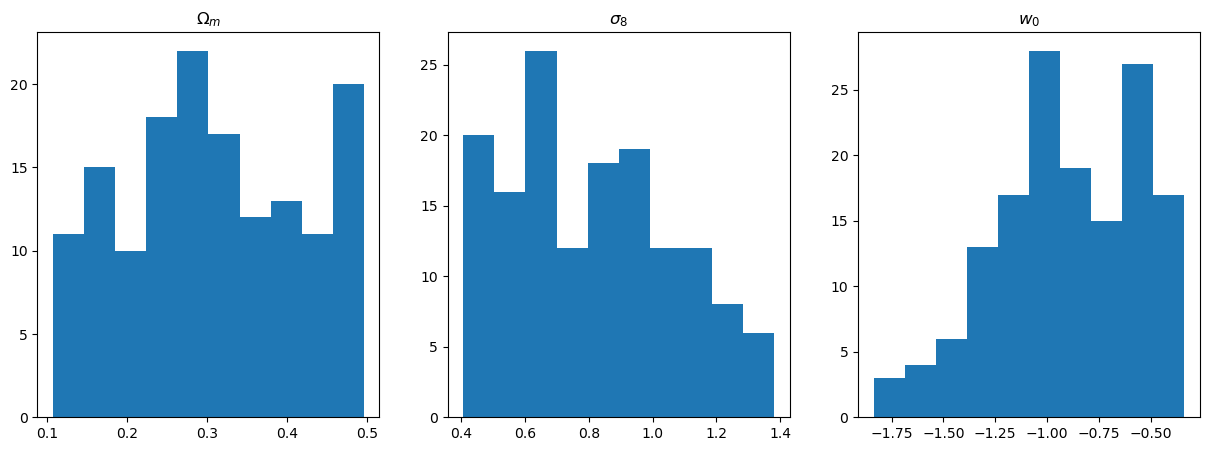

In [10]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].hist(O_m)
ax[0].set_title(r'$\Omega_m$')
ax[1].hist(sigma8)
ax[1].set_title(r'$\sigma_8$')
ax[2].hist(w0)
ax[2].set_title(r'$w_0$')

In [12]:
lines = [np.column_stack([ell, sims_mean[i]]) for i in range(len(sims_mean))]

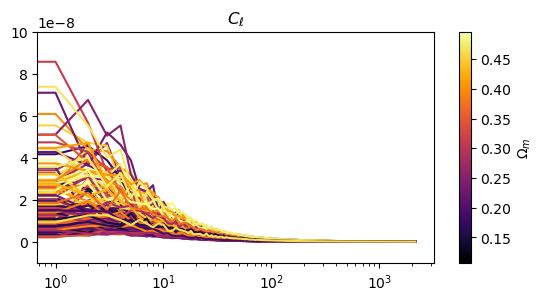

In [13]:
fig, ax = plt.subplots(figsize=(6.4, 3))
# set axes limits manually because Collections do not take part in autoscaling

# create a LineCollection with the half-circles and color mapping
line_collection = LineCollection(lines, array=O_m, cmap="inferno")
ax.add_collection(line_collection)
ax.set_xscale("log")
ax.set_ylim(-1e-8, 10e-8)

fig.colorbar(line_collection, label=r"$\Omega_m$")
ax.set_title(r"$C_{\ell}$")

plt.show()

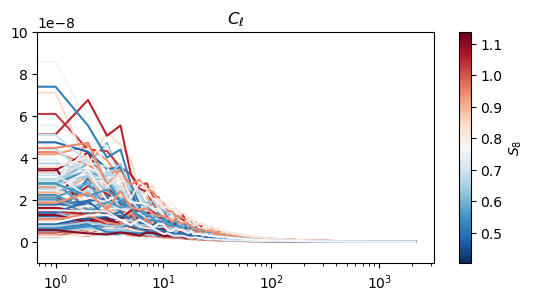

In [23]:
fig, ax = plt.subplots(figsize=(6.4, 3))
# set axes limits manually because Collections do not take part in autoscaling

# create a LineCollection with the half-circles and color mapping
line_collection = LineCollection(lines, array= (np.array(sigma8) * np.sqrt((np.array(O_m) / 0.3))), cmap="RdBu_r")
ax.add_collection(line_collection)
ax.set_xscale("log")
ax.set_ylim(-1e-8, 10e-8)

fig.colorbar(line_collection, label=r"$S_8$")
ax.set_title(r"$C_{\ell}$")

plt.savefig('cls_S8.png', bbox_inches='tight', dpi=500)
plt.show()

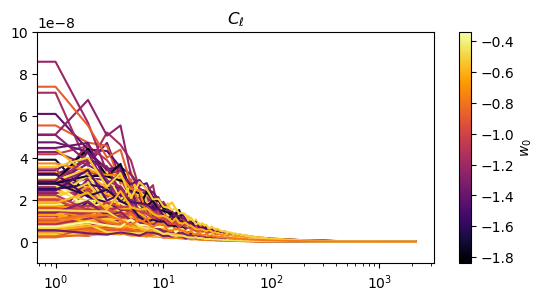

In [14]:
fig, ax = plt.subplots(figsize=(6.4, 3))
# set axes limits manually because Collections do not take part in autoscaling

# create a LineCollection with the half-circles and color mapping
line_collection = LineCollection(lines, array=w0, cmap="inferno")
ax.add_collection(line_collection)
ax.set_xscale("log")
ax.set_ylim(-1e-8, 10e-8)

fig.colorbar(line_collection, label=r"$w_0$")
ax.set_title(r"$C_{\ell}$")

plt.show()

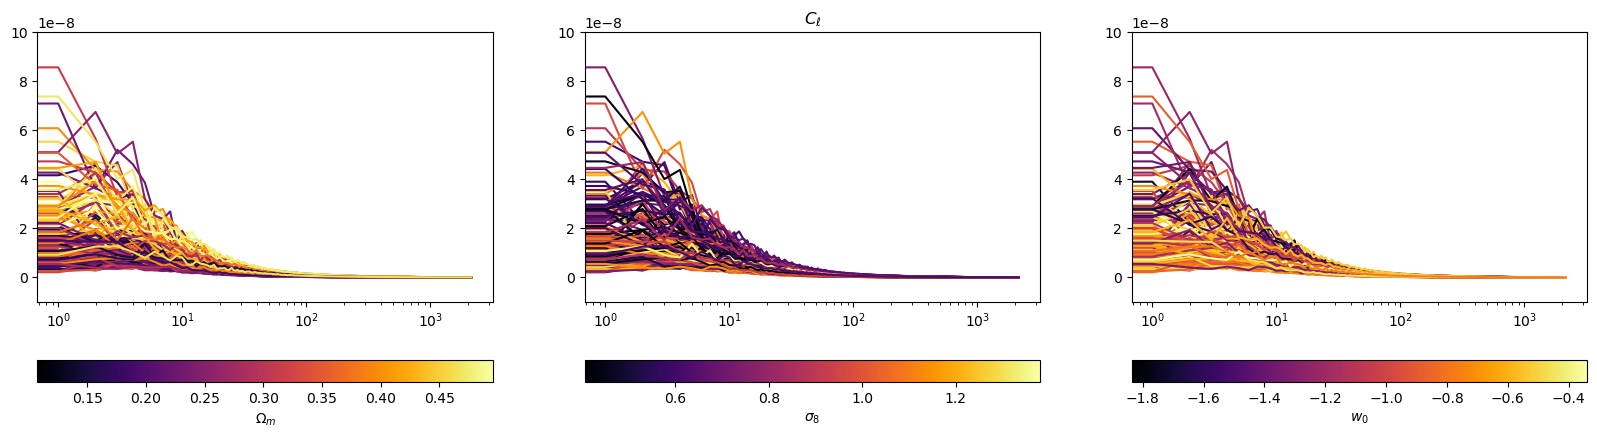

In [15]:
fig, ax = plt.subplots(1, 3, figsize=(20, 5))

#O_m
line_collection = LineCollection(lines, array=O_m, cmap="inferno")
ax[0].add_collection(line_collection)
ax[0].set_xscale("log")
ax[0].set_ylim(-1e-8, 10e-8)

fig.colorbar(line_collection, label=r"$\Omega_m$", location = 'bottom')

#sigma8
line_collection = LineCollection(lines, array=sigma8, cmap="inferno")
ax[1].add_collection(line_collection)
ax[1].set_xscale("log")
ax[1].set_ylim(-1e-8, 10e-8)

fig.colorbar(line_collection, label=r"$\sigma_8$", location = 'bottom')
ax[1].set_title(r"$C_{\ell}$")

#w8
line_collection = LineCollection(lines, array=w0, cmap="inferno")
ax[2].add_collection(line_collection)
ax[2].set_xscale("log")
ax[2].set_ylim(-1e-8, 10e-8)

fig.colorbar(line_collection, label=r"$w_0$", location = 'bottom')


plt.savefig('cls_params_variation.png', bbox_inches='tight', dpi=500)
plt.show()


# Plots Matriz de Covariância

In [33]:
sims = np.load(f"/share/storage2/fvs/test_cls/cls_zbin0_allrealizations_model1.npy")
dndz= np.load('/share/storage2/fvs/input_dndzs/n_z_sourcegals_forfalcon_z_0.npy')

cov = np.cov(sims.T)
icov = np.linalg.pinv(cov)

In [38]:
sims

array([[2.63234784e-16, 6.18967528e-10, 1.36869496e-08, ...,
        8.57730309e-12, 8.47280862e-12, 8.29863708e-12],
       [9.60071034e-17, 2.28362959e-08, 1.89314894e-08, ...,
        8.77148946e-12, 8.47203406e-12, 8.38574625e-12],
       [8.42244010e-18, 9.81727172e-09, 5.08287001e-08, ...,
        8.78184379e-12, 8.65257928e-12, 8.31176851e-12],
       ...,
       [2.45922024e-16, 1.22468331e-09, 2.12434714e-08, ...,
        8.51571087e-12, 8.47754902e-12, 8.43106947e-12],
       [3.13280718e-16, 3.37927320e-08, 1.71588059e-08, ...,
        8.44874830e-12, 8.36052478e-12, 8.54438773e-12],
       [1.07738056e-16, 8.11192106e-09, 1.47369325e-08, ...,
        8.30807352e-12, 8.62995673e-12, 8.41957365e-12]], shape=(7, 2201))

In [46]:
np.min(icov), np.max(icov)

(np.float64(-9.784073683182221e+29), np.float64(7.666361200644369e+29))

In [45]:
icov

array([[-4.09702555e+21,  3.21024542e+21, -5.08422108e+20, ...,
        -5.88117887e+16,  4.63777563e+16, -1.19441929e+16],
       [-8.36988466e+29,  6.55826613e+29, -1.03866435e+29, ...,
        -1.20147625e+25,  9.47459240e+24, -2.44009991e+24],
       [-1.91662077e+29,  1.50177805e+29, -2.37843859e+28, ...,
        -2.75126172e+24,  2.16958791e+24, -5.58758735e+23],
       ...,
       [ 4.16474936e+25, -3.26331076e+25,  5.16826322e+24, ...,
         5.97839473e+20, -4.71443804e+20,  1.21416303e+20],
       [-9.81441852e+24,  7.69013805e+24, -1.21792439e+24, ...,
        -1.40883551e+20,  1.11097845e+20, -2.86122960e+19],
       [-1.42347378e+24,  1.11537019e+24, -1.76646576e+23, ...,
        -2.04336141e+19,  1.61135241e+19, -4.14989976e+18]],
      shape=(2201, 2201))

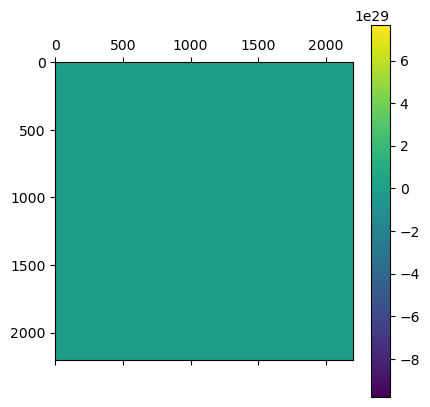

In [41]:
plt.matshow(icov)
plt.colorbar()

In [12]:
cls = np.load('/share/storage2/fvs/test_cls/cls_lens_zbin0_all_fiducial.npy')

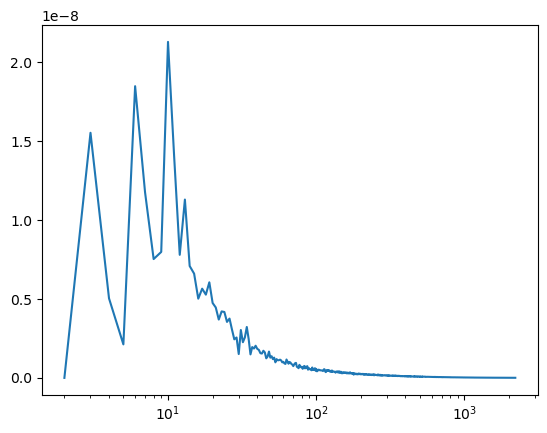

In [24]:
plt.plot(np.arange(2,2203),cls[0])
plt.xscale('log')

In [13]:
cov = np.cov(cls.T)

array([[5.39794168e-16, 1.55289894e-08, 5.03748386e-09, ...,
        5.33264027e-12, 5.29949229e-12, 5.33281954e-12],
       [1.32659910e-17, 2.34320670e-09, 2.00207778e-08, ...,
        5.38032582e-12, 5.48171598e-12, 5.43829080e-12],
       [2.01253503e-16, 4.89221314e-09, 2.51547823e-08, ...,
        5.48586893e-12, 5.50701994e-12, 5.64120084e-12],
       ...,
       [3.72934691e-17, 5.36713457e-08, 2.15747442e-08, ...,
        5.34252263e-12, 5.33375491e-12, 5.32699521e-12],
       [9.87125288e-16, 8.60573813e-09, 7.71621527e-09, ...,
        5.46615457e-12, 5.42381801e-12, 5.35387133e-12],
       [2.13397078e-19, 1.09035710e-08, 1.37931377e-08, ...,
        5.38431745e-12, 5.33023219e-12, 5.38000520e-12]],
      shape=(200, 2201))

In [17]:
icov = np.linalg.pinv(cov)

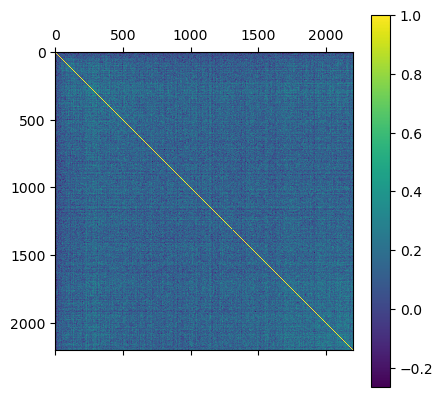

In [28]:
plt.matshow(np.corrcoef(cls.T))
plt.colorbar()

In [33]:
eigenvalues = np.linalg.eigvals(cov)
eigenvalues

array([ 1.37549997e-16+0.j,  2.26436717e-16+0.j,  9.96305105e-17+0.j, ...,
       -4.27284892e-42+0.j, -1.09579118e-42+0.j,  9.96445617e-42+0.j],
      shape=(2201,))

/home/ricardogonzatto/miniforge3/envs/polymv/lib/python3.12/site-packages/matplotlib/cbook.py:1719: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/ricardogonzatto/miniforge3/envs/polymv/lib/python3.12/site-packages/matplotlib/cbook.py:1355: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


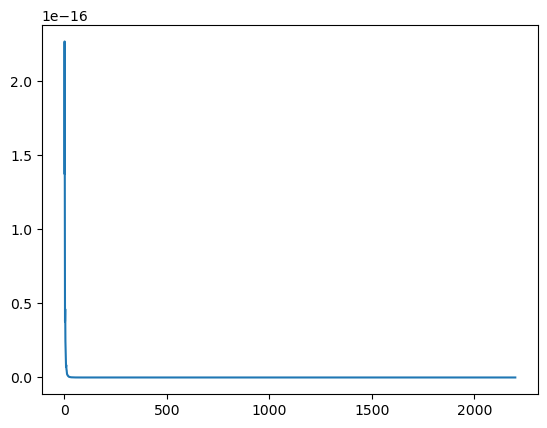

In [36]:
plt.plot(np.arange(0,2201), eigenvalues)

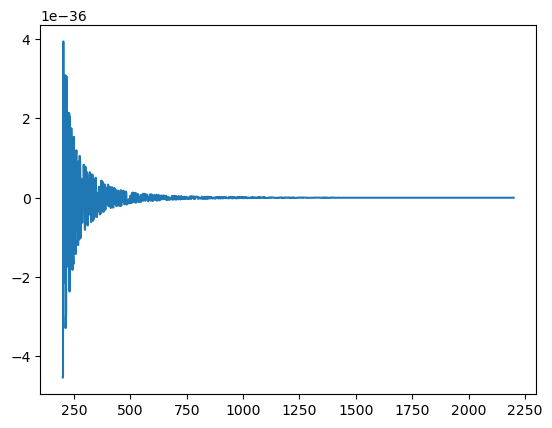

In [ ]:
plt.plot(np.arange(0,2201)[200:], eigenvalues[200:])

In [16]:
icov

array([[-1.63533375e+46, -1.70972102e+39,  2.20634840e+39, ...,
         9.71723039e+43,  1.72117116e+43, -6.43265343e+43],
       [ 2.94512537e+38,  2.16407684e+31, -4.24506454e+31, ...,
        -1.49079309e+36, -4.05689019e+35,  1.69663367e+36],
       [ 9.04980165e+37,  7.87434829e+30, -1.09643018e+31, ...,
        -5.17156276e+35, -5.45882898e+34,  3.95167618e+35],
       ...,
       [-4.58093804e+42, -2.51973490e+35,  8.39251611e+35, ...,
         2.08962499e+40,  1.11318357e+40, -3.36002554e+40],
       [-6.42604335e+42, -8.43912575e+35,  5.22081811e+35, ...,
         4.64993978e+40,  3.28504628e+39, -1.05647796e+40],
       [-2.12666945e+43, -2.00068055e+36,  2.76059283e+36, ...,
         1.27930069e+41,  2.29900996e+40, -7.99204962e+40]],
      shape=(2201, 2201))

In [19]:
icov

array([[ 1.40220681e+12,  2.34147010e+12, -8.56242711e+12, ...,
        -1.07912792e+14,  5.10068440e+13, -1.09798811e+14],
       [ 2.34155501e+12,  1.73780055e+16,  1.31538218e+15, ...,
        -5.80555585e+15,  1.38210761e+15,  5.38888385e+15],
       [-8.56348193e+12,  1.31538218e+15,  2.21884993e+16, ...,
         1.19883713e+15, -3.93972132e+14,  1.30663023e+16],
       ...,
       [-1.07928651e+14, -5.80555585e+15,  1.19883713e+15, ...,
         2.52298788e+17,  7.00992945e+16,  7.14803225e+16],
       [ 5.10123032e+13,  1.38210761e+15, -3.93972132e+14, ...,
         7.00992945e+16,  2.47367996e+17,  4.77327301e+16],
       [-1.09809025e+14,  5.38888385e+15,  1.30663023e+16, ...,
         7.14803225e+16,  4.77327301e+16,  2.75062838e+17]],
      shape=(2201, 2201))

In [44]:
np.sqrt(np.diag(cov))

array([2.43591357e-16, 1.49465044e-08, 1.16497280e-08, ...,
       1.29758781e-13, 1.32536206e-13, 1.45687302e-13], shape=(2201,))

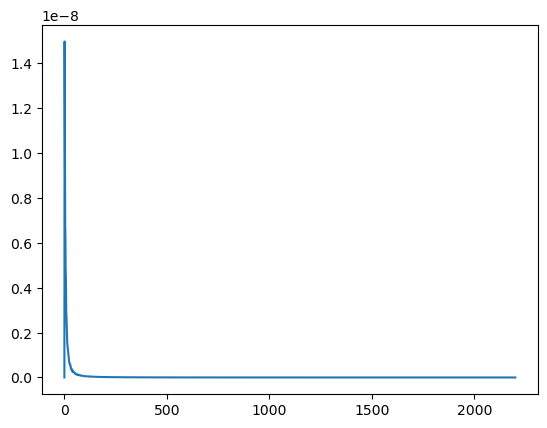

In [ ]:
plt.plot(np.arange(0,2201), np.sqrt(np.diag(cov)))

In [40]:
np.sqrt(np.diag(icov))

array([1.18414814e+06, 1.31825663e+08, 1.48958046e+08, ...,
       5.02293527e+08, 4.97361032e+08, 5.24464334e+08], shape=(2201,))

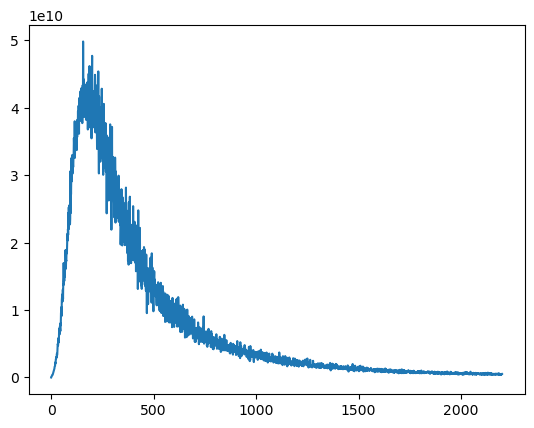

In [39]:
plt.plot(np.arange(0,2201), np.sqrt(np.diag(icov)))

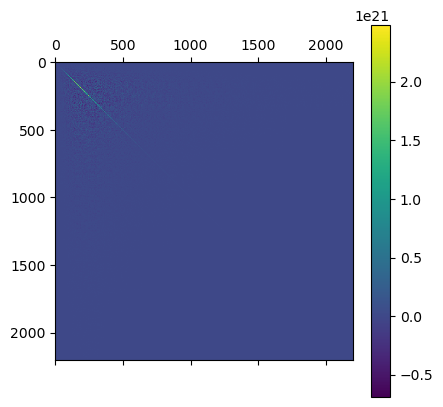

In [18]:
plt.matshow(icov)
plt.colorbar()